Desmatamento da Amazônia Legal nos anos 2011-2021

Dados de desmatamento coletado pelo PRODES disponível no site: http://www.dpi.inpe.br/prodesdigital/prodesmunicipal.php.
Note que os dados estão divididos em cada ano, portanto é necessário um algorítmo para unificar os dados em uma única base

In [99]:
import pandas as pd
import numpy as np

dados = pd.read_table("../Desmatamento/DesmatamentoMunicipios2011.txt", sep=",", encoding="UTF-8")
dados['Ano'] = [2011]*dados.__len__()

for i in range(2012, 2022): 
    x = pd.read_table(f'../Desmatamento/DesmatamentoMunicipios{i}.txt', sep=',', encoding='UTF-8')
    x['Ano'] = [i]*x.__len__()
    dados = pd.concat([dados, x])
dados.drop(['Nr', 'Latgms', 'Longms', 'CodIbge'], axis='columns', inplace=True)

for x in ['Desmatado', 'Floresta', 'NaoObservado', 'NaoFloresta', 'Hidrografia', 'Nuvem']:
    dados[f'{x}'] = dados[f'{x}2011'].replace(np.nan, 0)
    dados.drop([f'{x}2011'], axis='columns', inplace=True)
    for i in range(2012, 2022):
        dados[f'{x}'] = dados[f'{x}'] + dados[f'{x}{i}'].replace(np.nan, 0)
        dados.drop([f'{x}{i}'], axis='columns', inplace=True)

dados['Incremento'] = dados['Incremento20102011'].replace(np.nan, 0)
dados.drop(['Incremento20102011'], axis='columns', inplace=True)
for i in range(2012, 2022):
    dados['Incremento'] = dados['Incremento'] + dados[f'Incremento{i-1}{i}'].replace(np.nan, 1)
    dados.drop([f'Incremento{i-1}{i}'], axis='columns', inplace=True)

dados['PorcentDesmatado'] = dados['Desmatado']/dados['AreaKm2']
dados['PorcentDesmatado'].mask(dados['PorcentDesmatado'] > 1, 1, inplace=True)

dados.head()

,Lat,Long,Municipio,Estado,AreaKm2,Soma,Ano,Desmatado,Floresta,NaoObservado,NaoFloresta,Hidrografia,Nuvem,Incremento,PorcentDesmatado
0,-7.46114,-52.46225,São Félix do Xingu,PA,84253,100,2011,17144.8,62255.5,11.6,3788.0,939.0,114.1,150.4,0.203492
1,-3.12356,-47.40354,Paragominas,PA,19465,100,2011,8641.0,10301.9,4.2,7.1,36.0,474.8,46.0,0.443925
2,-5.52503,-49.94418,Marabá,PA,15161,100,2011,8315.4,6636.3,5.5,36.2,86.0,81.6,74.8,0.548473
3,-8.98448,-63.99115,Porto Velho,RO,34631,100,2011,8121.8,25298.1,27.2,431.9,751.1,0.9,334.9,0.234524
4,-11.22873,-57.64737,Juara,MT,22666,100,2011,7871.3,13066.8,0.3,1600.6,127.0,0.0,67.7,0.347273


In [106]:
import seaborn as sns
import matplotlib as plt

[Text(0, 0.5, 'Desmatado (Km2)'),
 Text(0.5, 1.0, 'Total do desmatamento atravez dos anos')]

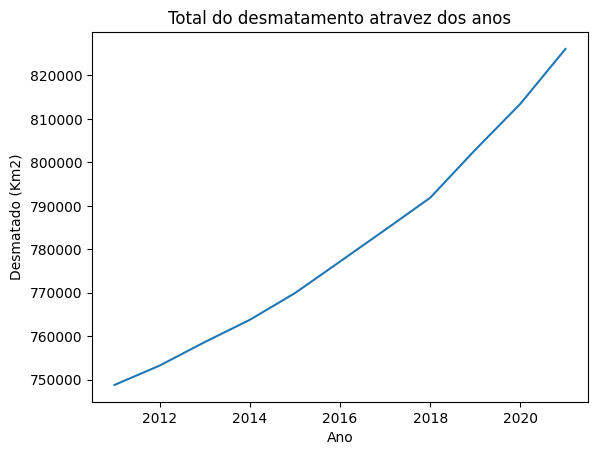

In [33]:
sns.lineplot(
    data=dados,
    x = 'Ano', y = 'Desmatado', 
    errorbar=None, estimator=np.sum
    ).set(
    ylabel="Desmatado (Km2)", title="Total do desmatamento atravez dos anos"
    )

[Text(0, 0.5, 'Desmatamento'), Text(0.5, 1.0, 'Desmatamento Anual')]

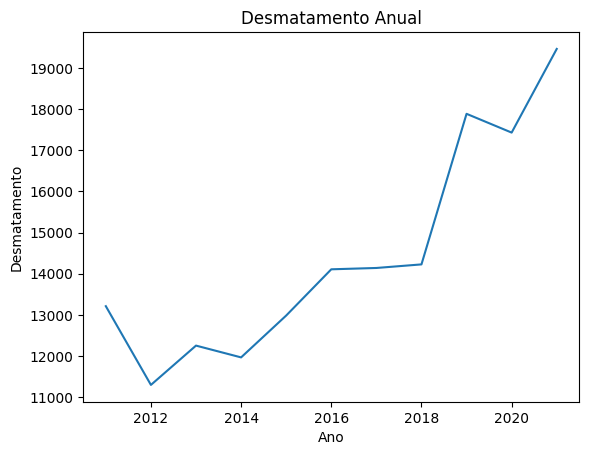

In [75]:
sns.lineplot(
    data=dados,
    x='Ano', y='Incremento',
    errorbar=None, estimator=np.sum
).set(ylabel="Desmatamento", title="Desmatamento Anual")

In [38]:
for i in range(2011, 2022):
    x = dados[dados['Ano'] == i]['Desmatado'].sum()

dados[dados['Ano'] == 2021]['Desmatado'].sum()/dados[dados['Ano'] == 2011]['Desmatado'].sum()

1.1032741804065218

[Text(0, 0.5, 'Área Desmatada (Km2)')]

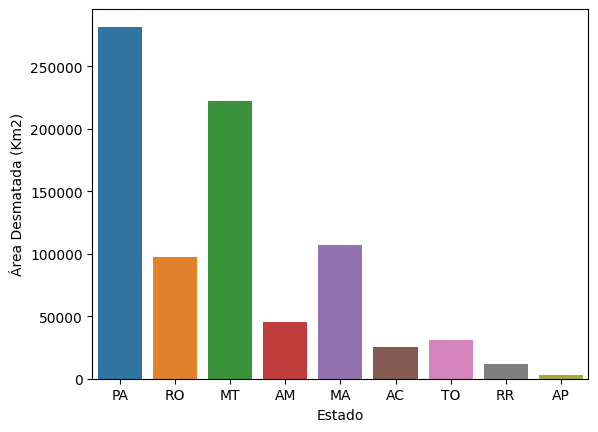

In [66]:
sns.barplot(
    data=dados[dados['Ano'] == 2021],
    x='Estado', y='Desmatado', 
    estimator=np.sum, errorbar=None
    ).set(ylabel="Área Desmatada (Km2)")

[Text(0.5, 1.0, 'Área desmatada em relação a área total do estado')]

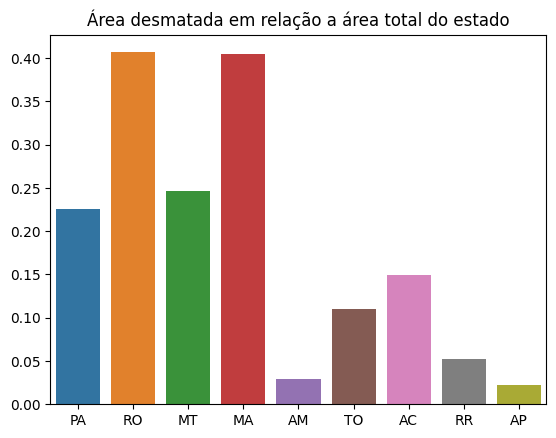

In [90]:
desmest = []
for x in dados['Estado'].unique():
    desmest.append(dados[(dados['Estado'] == f'{x}') & (dados['Ano'] == 2021)]['Desmatado'].sum()/dados[(dados['Estado'] == f'{x}') & (dados['Ano'] == 2021)]['AreaKm2'].sum())

sns.barplot(x=dados['Estado'].unique(), y=desmest).set(title="Área desmatada em relação a área total do estado")

[Text(0.5, 0, 'Longitude'),
 Text(0, 0.5, 'Latitude'),
 Text(0.5, 1.0, 'Mapa de Desmatamento')]

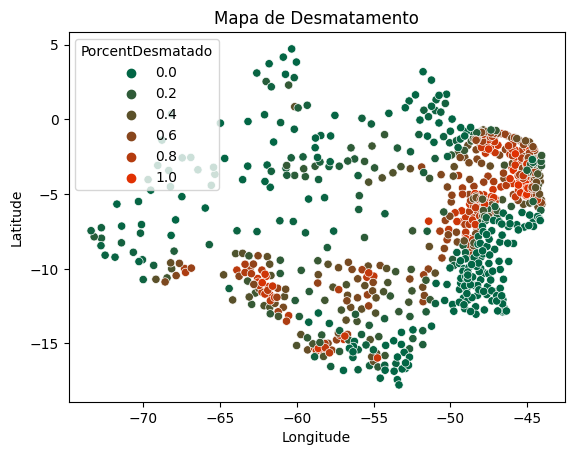

In [111]:
sns.scatterplot(
    data=dados[dados['Ano'] == 2021],
    x='Long', y='Lat', hue='PorcentDesmatado',
    palette=sns.color_palette("blend:#026645,#E13102", as_cmap=True)
    ).set(
    xlabel = 'Longitude', ylabel = 'Latitude', title = "Mapa de Desmatamento"
    )

In [102]:
sum(dados['PorcentDesmatado'] > 0.95)/dados.__len__()

0.03696172248803828

In [104]:
sum(dados['PorcentDesmatado'] > 0.6)/dados.__len__()

0.3026315789473684

In [113]:
dados[dados['Ano'] == 2021]['Desmatado'].sum()/dados[dados['Ano'] == 2021]['AreaKm2'].sum()

0.16300279713215032